In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# Compute PCA and show components

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

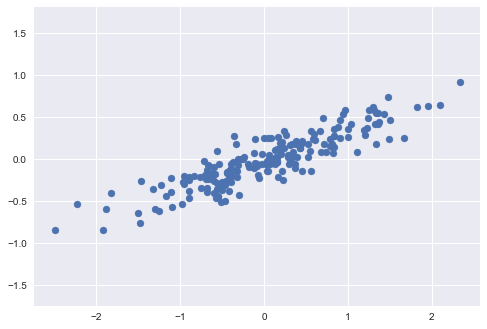

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [8]:
print(pca.explained_variance_)

[ 0.7625315  0.0184779]


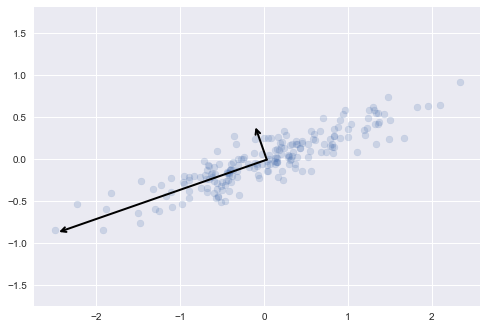

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

# PCA as dimensionality reduction

In [11]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

original shape:    (200, 2)
transformed shape: (200, 1)


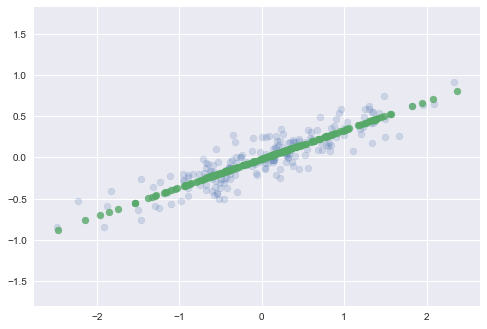

In [9]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

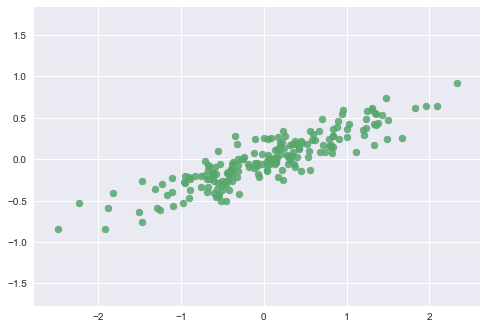

In [12]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

# PCA for visualization: Hand-written digits

(1797, 64)
(1797, 2)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
[ 179.0069301   163.71774688]


C:\Users\gmanish\AppData\Local\Continuum\Anaconda\envs\py36\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


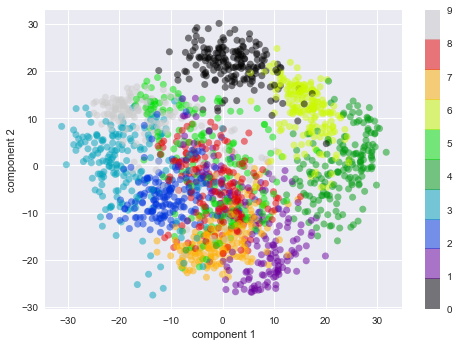

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

pca = PCA(n_components=2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
print(digits.target[:20])
print(pca.explained_variance_)
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

[  1.48905936e-01   1.36187712e-01   1.17945938e-01   8.40997942e-02
   5.78241466e-02   4.91691032e-02   4.31598701e-02   3.66137258e-02
   3.35324810e-02   3.07880621e-02   2.37234084e-02   2.27269657e-02
   1.82186331e-02   1.77385494e-02   1.46710109e-02   1.40971560e-02
   1.31858920e-02   1.24813782e-02   1.01771796e-02   9.05617439e-03
   8.89538461e-03   7.97123157e-03   7.67493255e-03   7.22903569e-03
   6.95888851e-03   5.96081458e-03   5.75614688e-03   5.15157582e-03
   4.89539777e-03   4.28887968e-03   3.73606048e-03   3.53274223e-03
   3.36683986e-03   3.28029851e-03   3.08320884e-03   2.93778629e-03
   2.56588609e-03   2.27742397e-03   2.22277922e-03   2.11430393e-03
   1.89909062e-03   1.58652907e-03   1.51159934e-03   1.40578764e-03
   1.16622290e-03   1.07492521e-03   9.64053065e-04   7.74630271e-04
   5.57211553e-04   4.04330693e-04   2.09916327e-04   8.24797098e-05
   5.25149980e-05   5.05243719e-05   3.29961363e-05   1.24365445e-05
   7.04827911e-06   3.01432139e-06

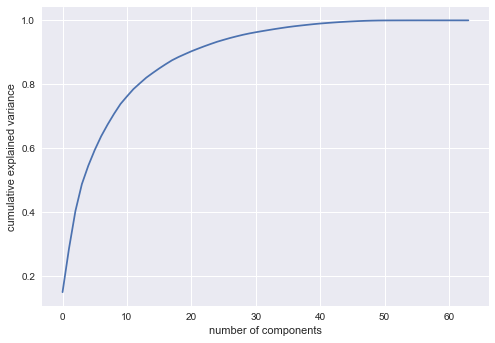

In [19]:
#Choosing the number of components
pca = PCA().fit(digits.data)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.

# Example: Eigenfaces

In [22]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
print(faces.data.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
(1348, 2914)


In [25]:
from sklearn.decomposition import PCA
pca = PCA(150,svd_solver='randomized')
pca.fit(faces.data)
#Because this is a large dataset, we will use RandomizedPCA—it contains 
#a randomized method to approximate the first $N$ principal components 
#much more quickly than the standard PCA estimator, and thus is very useful 
#for high-dimensional data (here, a dimensionality of nearly 3,000). 
#We will take a look at the first 150 components

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

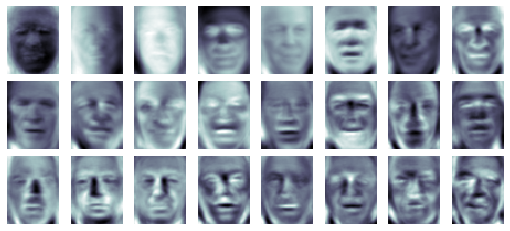

In [14]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    _=ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone');

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips. Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

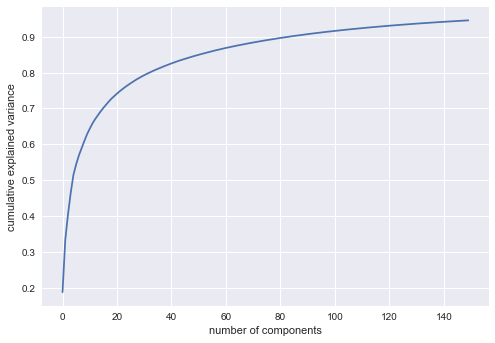

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 150 components account for just over 90% of the variance. That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data. To make this more concrete, we can compare the input images with the images reconstructed from these 150 components:

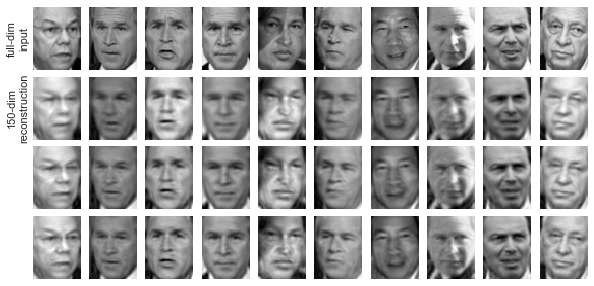

In [32]:
# Compute the components and projected faces
pca = PCA(100,svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
pca2 = PCA(150,svd_solver='randomized').fit(faces.data)
projected2 = pca2.inverse_transform(pca2.fit_transform(faces.data))
pca3 = PCA(200,svd_solver='randomized').fit(faces.data)
projected3 = pca3.inverse_transform(pca3.fit_transform(faces.data))
# Plot the results
fig, ax = plt.subplots(4, 10, figsize=(10, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    ax[2, i].imshow(projected2[i].reshape(62, 47), cmap='binary_r')
    ax[3, i].imshow(projected3[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features. This visualization makes clear why the PCA feature selection used in In-Depth: Support Vector Machines was so successful: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image. What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.